<a href="https://colab.research.google.com/github/is2295/Final-Project-Report-/blob/main/netflix_Nural_Network_Model_V_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# importing a packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')

In [6]:
# Loading a data from the CSV file
netflixStockDF = pd.read_csv('/content/drive/MyDrive/Project Work/NFLX_Dataset/NFLX.csv')
netflixStockDF.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
def preProcessing(Dataframe):
    '''
       Converting a data column into year,month, week and day.
    '''

    Dataframe['Date'] = pd.to_datetime(Dataframe['Date'])
    # Extrating a Number of year, month, week and day
    Dataframe['Year']  = Dataframe['Date'].dt.year
    Dataframe['Month'] = Dataframe['Date'].dt.month
    Dataframe['Week']  = Dataframe['Date'].dt.day_of_week
    Dataframe['Day']  = Dataframe['Date'].dt.day

    # removing missing values from the dataframe
    Dataframe.dropna()
    # Reordering a columns values
    Dataframe = Dataframe[['Year', 'Month', 'Week','Day','Open','High','Low', 'Close','Volume']]

    return Dataframe

In [9]:
netflixStockDF = preProcessing(netflixStockDF)
netflixStockDF

,Year,Month,Week,Day,Open,High,Low,Close,Volume
0,2018,2,0,5,262.000000,267.899994,250.029999,254.259995,11896100
1,2018,2,1,6,247.699997,266.700012,245.000000,265.720001,12595800
2,2018,2,2,7,266.579987,272.450012,264.329987,264.559998,8981500
3,2018,2,3,8,267.079987,267.619995,250.000000,250.100006,9306700
4,2018,2,4,9,253.850006,255.800003,236.110001,249.470001,16906900
...,...,...,...,...,...,...,...,...,...
1004,2022,1,0,31,401.970001,427.700012,398.200012,427.140015,20047500
1005,2022,2,1,1,432.959991,458.480011,425.540009,457.130005,22542300
1006,2022,2,2,2,448.250000,451.980011,426.480011,429.480011,14346000
1007,2022,2,3,3,421.440002,429.260010,404.279999,405.600006,9905200


In [10]:
# Summary of numerical Columns
netflixStockDF[['Open','High','Low', 'Close','Volume']].describe()

,Open,High,Low,Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,5.890430e+07


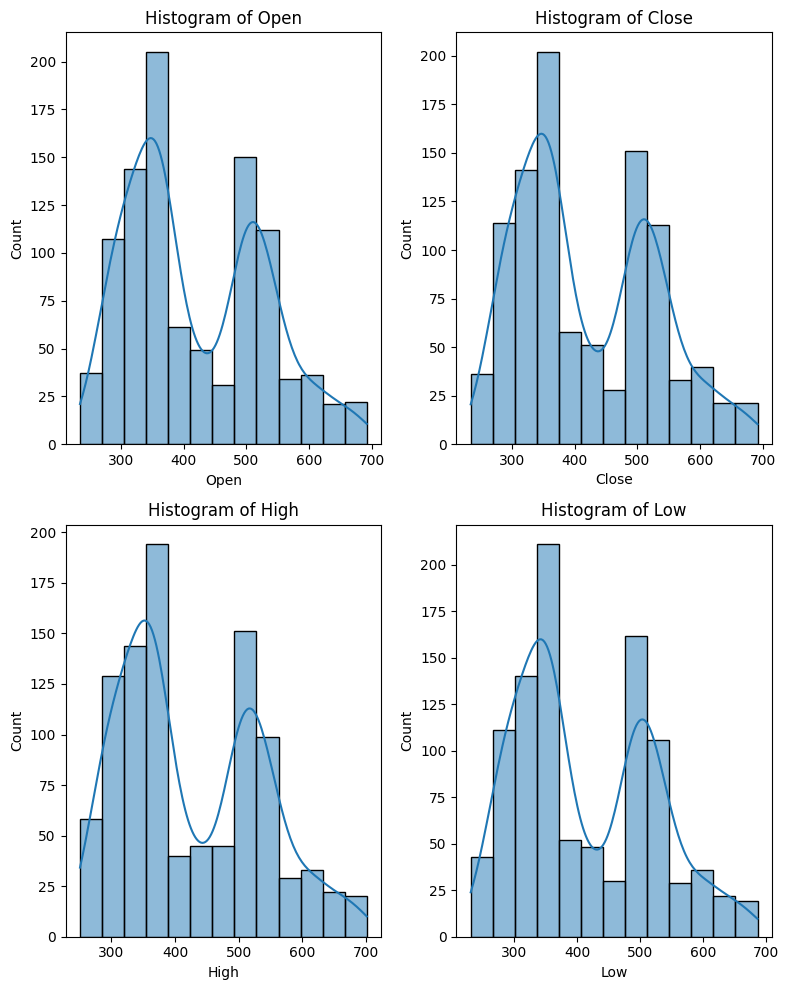

In [11]:
# Histogram plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,10))

# extrating a columns
netflixStockDF_col = ['Open','Close','High','Low']
for i, (colm, axes) in enumerate(zip(netflixStockDF_col, axes.flatten())):
  sns.histplot(data=netflixStockDF, x=colm, ax=axes, kde=True)
  axes.set_title(f'Histogram of {colm}')
plt.tight_layout()

            Open      High       Low     Close    Volume
Open    1.000000  0.998605  0.998508  0.996812 -0.415838
High    0.998605  1.000000  0.998203  0.998551 -0.400699
Low     0.998508  0.998203  1.000000  0.998544 -0.432116
Close   0.996812  0.998551  0.998544  1.000000 -0.413362
Volume -0.415838 -0.400699 -0.432116 -0.413362  1.000000


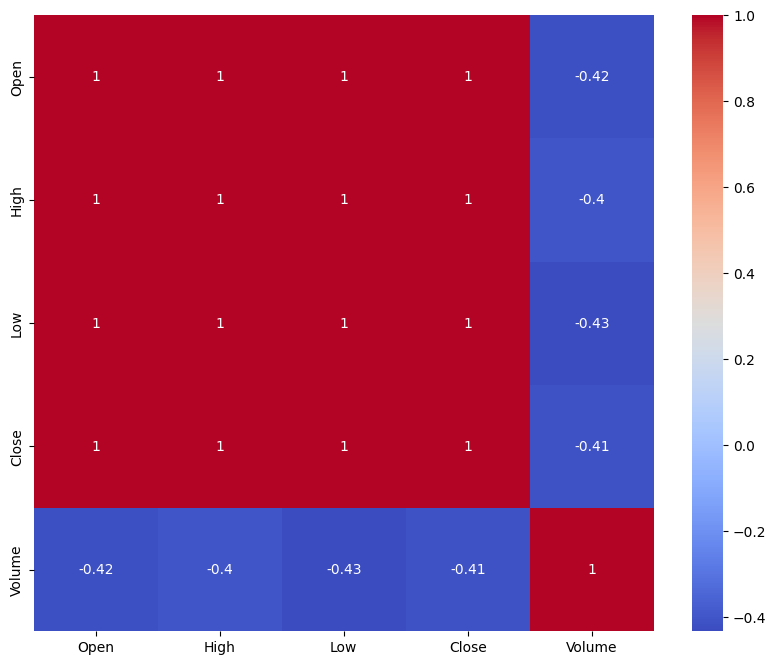

In [12]:
# Correlation matrix
corrmatrix_Netflix = netflixStockDF[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
print(corrmatrix_Netflix)

# Heatmap of the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corrmatrix_Netflix, annot=True, cmap='coolwarm')
plt.show()

In [13]:
# Normalizing a data using MinMaxScaler
netflixDF_col = netflixStockDF[['Open', 'High', 'Low', 'Close', 'Volume']]
scaler = MinMaxScaler()
netflixDF_col = scaler.fit_transform(netflixDF_col)
netflixDF_col

array([[0.06125254, 0.03830439, 0.0413314 , 0.04451626, 0.18615035],
       [0.03005911, 0.03563978, 0.03027306, 0.06954849, 0.19826421],
       [0.07124314, 0.04840791, 0.07276962, 0.06701469, 0.13569008],
       ...,
       [0.46753051, 0.44706226, 0.42925296, 0.4272515 , 0.22856529],
       [0.4090483 , 0.39661149, 0.38044671, 0.37509011, 0.15168204],
       [0.3782257 , 0.35999466, 0.36365037, 0.38507243, 0.11493015]])

In [14]:
# Splitting a data into training and testing
x = netflixStockDF[['Year','Month', 'Week', 'Day', 'Close']].values
y = netflixStockDF['Close'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print('X_train shape :' ,x_train.shape)
print('X_test  shape :' ,x_test.shape)
print('Y_train shape :' ,y_train.shape)
print('Y_test  shape :' ,y_test.shape)

X_train shape : (706, 5)
X_test  shape : (303, 5)
Y_train shape : (706,)
Y_test  shape : (303,)


In [15]:
# Training Randomforestregressor model
rm_model = RandomForestRegressor(n_estimators=100, random_state=42)
rm_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

Training MSE: 0.1577210408817614
Training MAE: 0.1616189238385462
Training R2 Score: 0.9999866464866326
Testing MSE: 0.4253983961942295
Testing MAE: 0.35537309854783655
Testing R2 Score: 0.9999626198083199


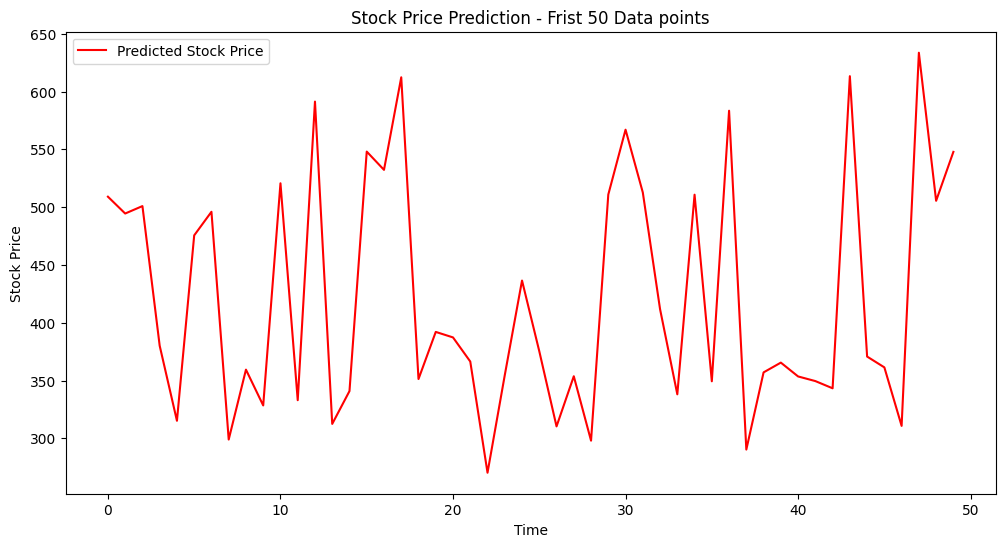

In [16]:
# Making prediction
y_train_pred = rm_model.predict(x_train)
y_test_pred = rm_model.predict(x_test)

# Evaluating the Model
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R2 Score: {train_r2}")

print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R2 Score: {test_r2}")

# Plotting the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test_pred[:50], color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction - Frist 50 Data points')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()